# Introduction

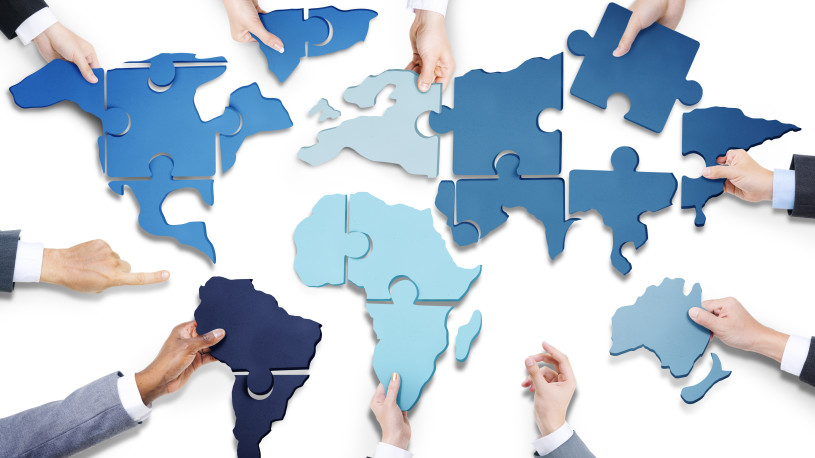

It only takes one toxic comment to sour an online discussion. The Conversation AI team, a research initiative founded by Jigsaw and Google, builds technology to protect voices in conversation. A main area of focus is machine learning models that can identify toxicity in online conversations, where toxicity is defined as anything rude, disrespectful or otherwise likely to make someone leave a discussion. If these toxic contributions can be identified, we could have a safer, more collaborative internet.

In the previous 2018 Toxic Comment Classification Challenge, Kagglers built multi-headed models to recognize toxicity and several subtypes of toxicity. In 2019, in the Unintended Bias in Toxicity Classification Challenge, you worked to build toxicity models that operate fairly across a diverse range of conversations. This year, we're taking advantage of Kaggle's new TPU support and challenging you to build multilingual models with English-only training data.

Jigsaw's API, Perspective, serves toxicity models and others in a growing set of languages (see our documentation for the full list). Over the past year, the field has seen impressive multilingual capabilities from the latest model innovations, including few- and zero-shot learning. We're excited to learn whether these results "translate" (pun intended!) to toxicity classification. Your training data will be the English data provided for our previous two competitions and your test data will be Wikipedia talk page comments in several different languages.

As our computing resources and modeling capabilities grow, so does our potential to support healthy conversations across the globe. Develop strategies to build effective multilingual models and you'll help Conversation AI and the entire industry realize that potential.

Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.

# Exploratory Data Analysis

**Importing all The necessary Libraries for performing EDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

**Reading the file**

In [ ]:
DIR_INPUT= '/kaggle/input/jigsaw-multilingual-toxic-comment-classification'
train_df1 = pd.read_csv(DIR_INPUT + '/jigsaw-toxic-comment-train.csv')
train_df1.head()

In [ ]:
print(train_df1.shape)
print(train_df1.size)
print(train_df1.columns)

In [ ]:
train_df2 = pd.read_csv(DIR_INPUT + '/jigsaw-unintended-bias-train.csv')
train_df2.head()

In [ ]:
print(train_df2.shape)
print(train_df2.size)
print(train_df2.columns)

In [ ]:
cols_filter = ['id', 'comment_text', 'toxic']
train_df = train_df1[cols_filter].append(train_df2[cols_filter])
train_df.head()

In [ ]:
print(train_df.shape)
print(train_df.size)
print(train_df.columns)

In [ ]:
train_df['toxic'].unique

In [ ]:
train_df['toxic'].values

In [ ]:
train_df['toxic']=train_df['toxic']>0.5

In [ ]:
train_df.shape

In [ ]:
train_df['toxic'].value_counts(normalize=True)

In [ ]:
sns.barplot(x=['Not-toxic', 'Toxic'], y=train_df.toxic.value_counts())

From this visualization we must understand that Toxic comments are very less compared to NOn-toxic comments

This makes our model more bias to Non-toxic Comments. So inorder to reduce this bias we have to perform Upsampling.

Upsampling is a technique which multiplies the Toxic comments eual to Non-toxic comments. So in this way our model bias will be reduced.

In [ ]:
valid_df = pd.read_csv(DIR_INPUT + '/validation.csv')
valid_df.head()

In [ ]:
per_lang = valid_df['lang'].value_counts()

In [ ]:
sns.barplot(x=per_lang.index, y=per_lang.values)

From validation data the frequency of the lang is in that way as above visuaization

In [ ]:
valid_df.toxic.value_counts(normalize=True)

In [ ]:
sns.barplot(x=['Not-toxic', 'Toxic'], y=valid_df.toxic.value_counts())

In [ ]:
per_lang = valid_df.groupby(by=['lang', 'toxic']).count()[['id']]
per_lang

This table explains that the number of toxic and non-toxic comments for each and every lang

In [ ]:
data=[]
for lang in valid_df['lang'].unique():
      y = per_lang[per_lang.index.get_level_values('lang') == lang].values.flatten()
      data.append(go.Bar(name=lang, x=['Non-toxic', 'Toxic'], y=y))
fig = go.Figure(data=data)
fig.update_layout(
    title='Language distribution in the validation dataset',
    barmode='group'
)
fig.show()

In [ ]:
test_df = pd.read_csv(DIR_INPUT + '/test.csv')
test_df.head()

In [ ]:
test_df['lang'].value_counts()

In [ ]:
per_lang = test_df['lang'].value_counts()
sns.barplot(x=per_lang.index, y=per_lang.values)

In [ ]:
rnd_comments = train_df[train_df['toxic'] == 0].sample(n=10000)['comment_text'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['Trump', 'people', 'one', 'will']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in non-toxic comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

From the above word Cloud , we can see the words displayed with more frequency. These are the words found frequently in Non-toxic Comments. 

In [ ]:
rnd_comments = train_df[train_df['toxic'] == 1].sample(n=10000)['comment_text'].values
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS.update(['Trump', 'people', 'one', 'will']))
wc.generate(" ".join(rnd_comments))

plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Frequent words in toxic comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()


From the above word Cloud , we can see the words displayed with more frequency. These are the words found frequently in Toxic Comments. 

In [ ]:
train_df.groupby('toxic').describe()

# TEXT PROCESSING- **Cleaning the text**

Lets clean the comments by removing stopwords,punctuations,alpha numeric words

Import all the necessary libraries for performing text processing

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
import nltk 
import string 
from nltk.corpus import stopwords

In [ ]:
stopwords_set= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
x = stopwords.words("english")
stopwords_nltk_en = set(x)
stopwords_nltk_en

In [ ]:
stoplist_combined = set.union(stopwords_set, stopwords_nltk_en)

Cleaning up the text

In [ ]:
import re
from tqdm import tqdm
from bs4 import BeautifulSoup
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def cleanup_text(msg):
    No_Punctuation = [char for char in msg if char not in string.punctuation]
    sentance = ''.join(No_Punctuation) #joins all the strings
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    return [word.lower() for word in sentance.split() if word.lower() not in stoplist_combined]

In [ ]:
#train_df['imp_words']= train_df['comment_text'].apply(cleanup_text)
#test_df['imp_words']=test_df['content'].apply(cleanup_text)
#valid_df['imp_words']=valid_df['comment_text'].apply(cleanup_text)

You can also do this, but it takes lot of time ,so i found alternative way which cleans the content faster. 
But the above method cleans the text very nicely

In [ ]:
test_df = pd.read_csv(DIR_INPUT + '/test.csv')
test_df.head()

In [ ]:
train = train_df
test = test_df

# remove '\\n'
train['comment_text'] = train['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
train['comment_text'] = train['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))


# test set
# remove '\\n'
test['content'] = test['content'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
test['content'] = test['content'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
test['content'] = test['content'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
test['content'] = test['content'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))



In [ ]:
valid=valid_df
# remove '\\n'
valid['comment_text'] = valid['comment_text'].map(lambda x: re.sub('\\n',' ',str(x)))
    
# remove any text starting with User... 
valid['comment_text'] = valid['comment_text'].map(lambda x: re.sub("\[\[User.*",'',str(x)))
    
# remove IP addresses or user IDs
valid['comment_text'] = valid['comment_text'].map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    
#remove http links in the text
valid['comment_text'] = valid['comment_text'].map(lambda x: re.sub("(http://.*?\s)|(http://.*)",'',str(x)))


In [ ]:
X_train=train.drop('toxic',axis=1)
Y_train=train['toxic']
X_valid=valid.drop('toxic',axis=1)
Y_valid=valid['toxic']

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_valid  = encoder.fit_transform(Y_valid)

In [ ]:
Y_train

In [ ]:
Y_valid

# **Using TF-IDF to convert text to vector**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word',  token_pattern=r'\w{2,}', max_features=5000)

In [ ]:
tfidf_fit_tra = tfidf_vect.fit_transform(X_train).toarray()     # Fit-transform of Train data
tfidf_fit_tra

# NOW START BUILDING THE MODEL

I will update the model of having high accuracy soon, stay tuned
Please upvote if you like it and keep me motivated 